In [2]:
from IPython.core.display import HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%load_ext autoreload
%autoreload 1

Author: Andrew Tarzia

Date Created: 05 Aug 2018

License:

# Notebook to analyse all enzymes used in ZIF-8 experiments using BRENDA database

TODO:
- add license
- modifications
    - introduce exposure consideration
        - get another method for calculating exposure without structure?
    - generalise code to multiple target residues ("targ = convert_to_one_letter_code_sing('target_res')" needs to act on a list

In [3]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
from Bio import SeqIO
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio.Alphabet import IUPAC
from rdkit.Chem.Draw import IPythonConsole  # to show molecules in notebook
import time
import numpy as np
# ensure cpickle usage
try:
    import cPickle as pickle
except ModuleNotFoundError:
    import pickle
%aimport pi_fn
%aimport parameters
%aimport brenda_IO
%aimport SABIO_IO

# Notes:
## Biopython:
- pK values and the methods are taken from::
    * Bjellqvist, B.,Hughes, G.J., Pasquali, Ch., Paquet, N., Ravier, F.,
    Sanchez, J.-Ch., Frutiger, S. & Hochstrasser, D.F.
    The focusing positions of polypeptides in immobilized pH gradients can be
    predicted from their amino acid sequences. Electrophoresis 1993, 14,
    1023-1031.
    * Bjellqvist, B., Basse, B., Olsen, E. and Celis, J.E.
    Reference points for comparisons of two-dimensional maps of proteins from
    different human cell types defined in a pH scale where isoelectric points
    correlate with polypeptide compositions. Electrophoresis 1994, 15, 529-539.

|  AA | pKa  |
|-----|------|
| ASP | 4.05 |
| GLU | 4.45 |
| HIS | 5.98 |
| CYS | 9.00 |
| TYR | 10.0 |
| LYS | 10.0 |
| ARG | 12.0 |
| N-terminus | 7.50 |
| N-terminus : GLU | 7.7 |
| N-terminus : VAL | 7.44 |
| N-terminus : THR | 6.82 |
| N-terminus : PRO | 8.36 |
| N-terminus : SER | 6.93 |
| N-terminus : MET | 7.00 |
| N-terminus : ALA | 7.59 |
| C-terminus | 3.55 |
| C-terminus : ASP | 4.55 |
| C-terminus : GLU | 4.75 |

- with the above pKas and the data set in Tash's paper (DOI:) we apply a pI cut off = XX.


## modified pIs:
- assuming sequence only and therefore cannot use DSSP to calculate exposure

## setup 

In [4]:
# get parameters
param_dict = parameters.get_parameters()

# input parameters
database_directory = '/home/atarzia/psp/sequence_db/bio_min_dataset/'
output_dir = database_directory


In [5]:
# set EC numbers of interest based on dataset
# 'none' in species lists implies species was not given with literature report.
EC_set = {
    # EC : species list
    '1.11.1.5': ['equus caballus', ],
    '1.11.1.6': ['bos taurus', ],
    '1.11.1.7': ['armoracia rusticana', ],
    '1.9.3.1': ['equus caballus', ],
    '1.1.5.2': ['none', ],
    '3.5.1.5': ['canavalia ensiformis'],
    '1.1.3.4': ['aspergillus niger'],
    '1.13.12.4': ['none'],
    '3.2.1.26': ['none'],
    '3.1.1.3': ['thermomyces lanuginosus', 'alcaligenes sp.',
                'pseudomonas fluorescens',
                'rhizomucor miehei', 'candida antarctica',
                'aspergillus niger'],
    '3.1.1.6': ['lactobacillus acidophilus'],
    '3.5.1.11': ['none'],
    }

## calculate all pIs
### distribution for each EC No.

In [6]:
# get input FASTA file names
database_names = []
for i in glob.glob(database_directory+"*fasta"):
    if "_mod" not in i:
        database_names.append(i)
database_names = sorted(database_names)
print('databases:')
for i in database_names:
    print('--', i.replace(database_directory, ''))

# prepare output CSV file
redo_pi = input('redo pI calculation (True = yes, False = no)')
if redo_pi is True:
    pi_fn.prepare_out_csv(output_dir, param_dict)
    # fix formatting of FASTA files to match BIOPYTHON readable
    pi_fn.fix_fasta(database_names)

databases:
-- 1_11_1_5__BRENDA_sequences.fasta
-- 1_11_1_6__BRENDA_sequences.fasta
-- 1_11_1_7__BRENDA_sequences.fasta
-- 1_13_12_4__BRENDA_sequences.fasta
-- 1_1_3_4__BRENDA_sequences.fasta
-- 1_1_5_2__BRENDA_sequences.fasta
-- 1_9_3_1__BRENDA_sequences.fasta
-- 3_1_1_3__BRENDA_sequences.fasta
-- 3_1_1_6__BRENDA_sequences.fasta
-- 3_2_1_26__BRENDA_sequences.fasta
-- 3_5_1_11__BRENDA_sequences.fasta
-- 3_5_1_5__BRENDA_sequences.fasta
redo pI calculation (True = yes, False = no)False


calculate all pIs for target EC sequences
doing: /home/atarzia/psp/sequence_db/bio_min_dataset/1_11_1_5__BRENDA_sequences.fasta
plot distribution of pIs
done
doing: /home/atarzia/psp/sequence_db/bio_min_dataset/1_11_1_6__BRENDA_sequences.fasta
plot distribution of pIs
done
doing: /home/atarzia/psp/sequence_db/bio_min_dataset/1_11_1_7__BRENDA_sequences.fasta
plot distribution of pIs
done
doing: /home/atarzia/psp/sequence_db/bio_min_dataset/1_13_12_4__BRENDA_sequences.fasta
plot distribution of pIs
done
doing: /home/atarzia/psp/sequence_db/bio_min_dataset/1_1_3_4__BRENDA_sequences.fasta
plot distribution of pIs
done
doing: /home/atarzia/psp/sequence_db/bio_min_dataset/1_1_5_2__BRENDA_sequences.fasta
plot distribution of pIs
done
doing: /home/atarzia/psp/sequence_db/bio_min_dataset/1_9_3_1__BRENDA_sequences.fasta
plot distribution of pIs
done
doing: /home/atarzia/psp/sequence_db/bio_min_dataset/3_1_1_3__BRENDA_sequences.fasta
plot distribution of pIs
done
doing: /home/atarzia/psp/sequence

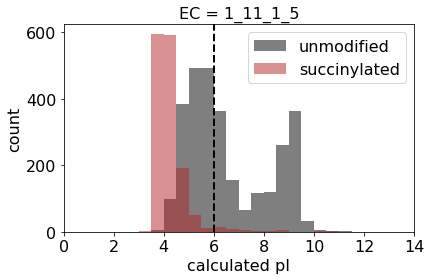

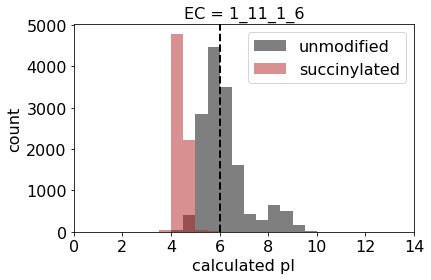

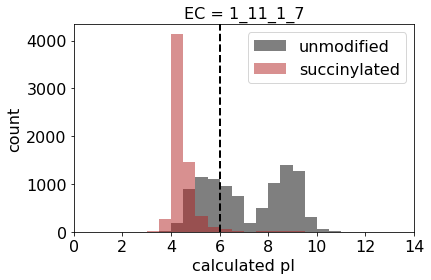

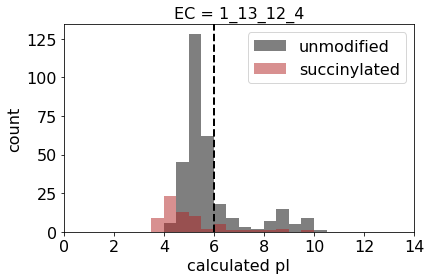

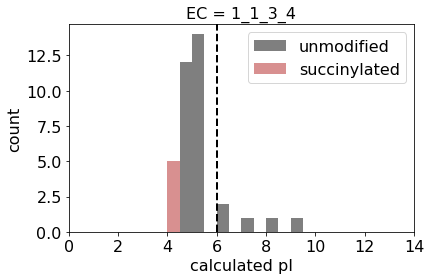

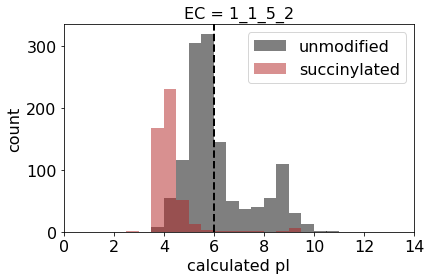

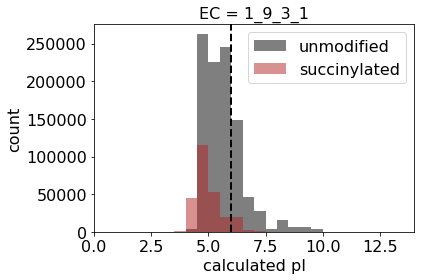

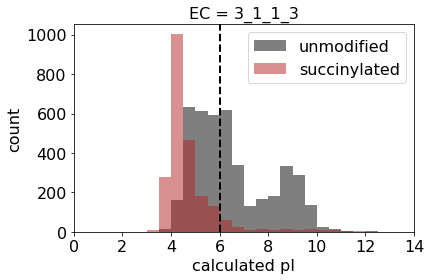

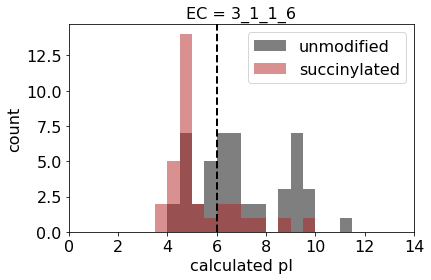

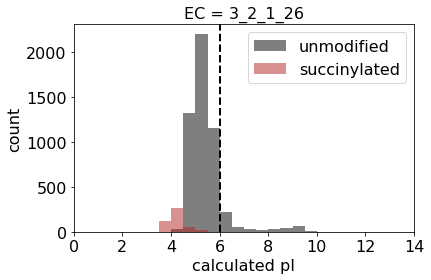

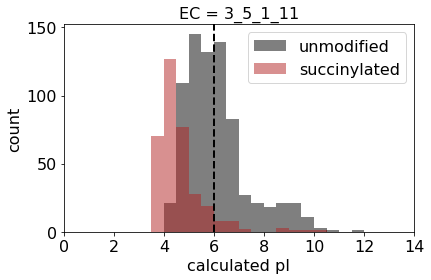

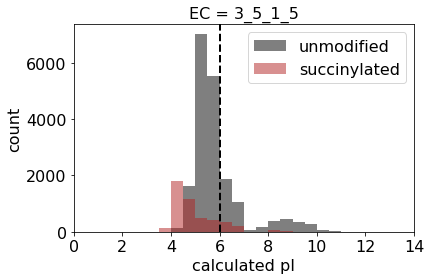

In [7]:
print('calculate all pIs for target EC sequences')
for EC_file in database_names:
    # read the file
    # but to avoid memory issues
    # we will calculate the pI on the fly
    # using the bio python module
    print('doing:', EC_file)
    file_mod = EC_file.replace(".fasta", "_mod.fasta")
    if redo_pi is True:
        pi_fn.calculate_pI_from_file(file_mod, param_dict, output_dir)
    print('plot distribution of pIs')
    pi_data = pd.read_csv(output_dir+param_dict['out_CSV_pi'], index_col=False)
    EC_pi_data = pi_data[pi_data['fasta_file'] == file_mod]
    pi_fn.plot_EC_pI_dist(EC_pi_data, param_dict,
                          filename=file_mod.replace('.fasta', '.pdf'),
                          title=file_mod.replace(output_dir, '').replace('__BRENDA_sequences_mod.fasta', ''))
    print('done')

(0, 30000)

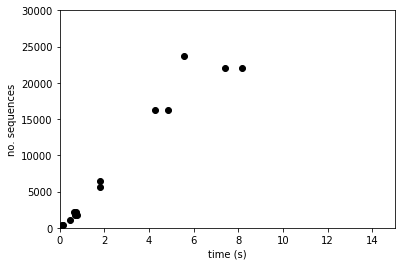

In [8]:
times = [0.74, 8.18, 4.85, 0.13, 0.02, 0.78, 
         0.62, 7.42, 4.26, 0.11, 0.01, 0.67, 
         300.89, 1.81, 0.03, 1.82, 0.44, 5.56]
seqs = [2220, 22068, 16288, 379, 36, 1765, 2220,
        22068, 16288, 379, 36, 1765, 1253592,
        6487, 80, 5665, 1098, 23660]
plt.scatter(times, seqs, c='k')
plt.xlabel('time (s)')
plt.ylabel('no. sequences')
plt.xlim(0, 15)
plt.ylim(0, 30000)

## using BRENDA - highlight specific species associated with sequence and pI (if available)

- find specific species from output data
    - report their pI
- get all reactants and products

In [9]:
# prepare output CSV file
redo_br = True  # input('redo BRENDA screening (True = yes, False = no)')
if redo_pi is True:
    string = ''
    for i in param_dict['out_columns_br']:
        if i == param_dict['out_columns_br'][-1]:
            string += i
        else:
            string += i+','
    string += '\n'
    with open(output_dir+param_dict['out_CSV_br'], 'w') as f:
        f.write(string)

In [10]:
# read in pI output file
pi_data = pd.read_csv(output_dir+param_dict['out_CSV_pi'], index_col=False)

In [8]:
pi_data.iloc[0]

fasta_file      /home/atarzia/psp/sequence_db/bio_min_dataset/...
acc.code                                                  Q6CAB5 
organism                                 cytochrome-c peroxidase 
EC.code                                                 1.11.1.5 
species            Yarrowia lipolytica (strain CLIB 122 / E 150) 
note                                                   Swiss-Prot
pi                                                           4.86
modification                                                    0
category                                                        0
Name: 0, dtype: object

## Collect pI specific to certain species in bio min database

In [9]:
print('Screen all Enzymes in EC Classes using BRENDA data')
count_done = 0
total_start_time = time.time()
for EC_file in database_names:
    if EC_file != '/home/atarzia/psp/sequence_db/bio_min_dataset/1_11_1_7__BRENDA_sequences.fasta':
        continue
    # read the file
    # but to avoid memory issues
    # we will calculate the pI on the fly
    # using the bio python module
    print('-----------------------------------------------')
    print('doing:', EC_file)
    file_mod = EC_file.replace(".fasta", "_mod.fasta")
    EC_pi_data = pi_data[pi_data['fasta_file'] == file_mod]
    # only keep those that pass the pI test
    pi_passed_data = EC_pi_data[EC_pi_data['pi'] < param_dict['cutoff_pi']]
    print('--- ', 
          len(pi_passed_data), 'proteins out of', len(EC_pi_data), 
          'remain, OR', int(len(pi_passed_data)/len(EC_pi_data)*100),
          "% ---")
    EC_no = list(set(EC_pi_data['EC.code']))[0].replace(' ', '').replace(".", "_")
    print('EC:', EC_no.replace("_", "."))
    br_datafile = 'brenda_download_'+EC_no+'.txt'
    # convert br_datafile into dictionary
    br_symbols, br_data = brenda_IO.get_brenda_dict(param_dict['BRENDA_DB_loc']+br_datafile)
    # from here is quite bio-min assay literature specific - although the code can be reused
    # get species of interest from known EC records
    species_of_interest = EC_set[EC_no.replace('_', '.')]
    for spec in species_of_interest:
        print('species:', spec)
        # is species in sequence data?
        spec_in_seq, spec_in_br = brenda_IO.is_species_reported(spec, 
                                                                EC_pi_data, 
                                                                br_data, 
                                                                verbose=True)
        PR_of_int = []
        for i in sorted(br_data['PR']):
            if spec in i.lower():
                # this assumes that the first item of each line is always "#"
                PR_info = i.split("#")[1]            
                if PR_info not in PR_of_int:
                    PR_of_int.append(PR_info)
        # get pI from BRENDA
        prop_of_int = 'PI'
        list_of_int = br_data[prop_of_int]
        # get list of protein codes with property of interest
        EC_prop_PR_codes = brenda_IO.get_prop_PR_codes(list_of_int)
        value_of_int = {}
        for PR in PR_of_int:
            if PR in set([j for i in EC_prop_PR_codes.values() for j in i ]):
                print('protein code:', PR, 'has', prop_of_int, 'in BRENDA')
            else:
                print('protein code:', PR, 'does not have', prop_of_int, 'in BRENDA')
            values = [list_of_int[i].split(" ")[1] 
                      for i in EC_prop_PR_codes.keys() if PR in EC_prop_PR_codes[i]]
            # apply property specific rules
            # check for ranges - append min and max
            values_min = [i.split('-')[0] for i in values if '-' in i and i[0] != '-']
            values_max = [i.split('-')[1] for i in values if '-' in i and i[0] != '-']
            if len(values_min) > 0 and len(values_max) > 0:
                for i in np.arange(len(values)-1, -1, -1):
                    if '-' in values[i]:
                        del values[i]
                print(values_min, values_max)
                values.append(values_min[0])
                values.append(values_max[0])
            # PI == float
            values = [float(i) for i in values]
            # PI => between 0 and 14
            values = [i for i in values if i >= 0 and i <= 14]
            if len(values) > 0:
                value_of_int[PR] = values
        print('reported pIs in BRENDA:', value_of_int.values())
    count_done += 1
print('--- finished %s EC classes in %s seconds ---' % (count_done, '{0:.2f}'.format(time.time() - total_start_time)))

Screen all Enzymes in EC Classes using BRENDA data
-----------------------------------------------
doing: /home/atarzia/psp/sequence_db/bio_min_dataset/1_11_1_7__BRENDA_sequences.fasta
---  9633 proteins out of 16288 remain, OR 59 % ---
EC: 1.11.1.7
species: armoracia rusticana
species in sequence data: True
species in BRENDA data: True
protein code: 52 has PI in BRENDA
protein code: 92 does not have PI in BRENDA
reported pIs in BRENDA: dict_values([[9.0, 6.4, 8.8]])
--- finished 1 EC classes in 0.18 seconds ---


## Collect reactant-product systems 
- curently as species specific for test case
    - generalize to all available reaction systems
- need general code for reading the BRENDA file lines and getting reactants and products and meta
- need general code for outputting these as reaction systems (to JSON?)
- need general code for interfacing reaction systems into SMILES (using the name in BRENDA) and collecting
    - molecule size
    - cost?

In [12]:
from IPython.display import clear_output

In [15]:
print('Screen all Enzymes in EC Classes using BRENDA data')
count_done = 0
total_start_time = time.time()
for EC_file in database_names:
    if EC_file != '/home/atarzia/psp/sequence_db/bio_min_dataset/1_11_1_7__BRENDA_sequences.fasta':
        continue
    # read the file
    # but to avoid memory issues
    # we will calculate the pI on the fly
    # using the bio python module
    print('-----------------------------------------------')
    print('doing:', EC_file)
    file_mod = EC_file.replace(".fasta", "_mod.fasta")
    EC_pi_data = pi_data[pi_data['fasta_file'] == file_mod]
    # only keep those that pass the pI test
    pi_passed_data = EC_pi_data[EC_pi_data['pi'] < param_dict['cutoff_pi']]
    print('--- ', 
          len(pi_passed_data), 'proteins out of', len(EC_pi_data), 
          'remain, OR', int(len(pi_passed_data)/len(EC_pi_data)*100),
          "% ---")
    EC_no = list(set(EC_pi_data['EC.code']))[0].replace(' ', '').replace(".", "_")
    print('EC:', EC_no.replace("_", "."))
    br_datafile = 'brenda_download_'+EC_no+'.txt'
    # convert br_datafile into dictionary
    br_symbols, br_data = brenda_IO.get_brenda_dict(param_dict['BRENDA_DB_loc']+br_datafile)
    # from here is quite bio-min assay literature specific
    # - although the code can be reused
    # get species of interest from known EC records
    ## when generalizing - we want to remove this for loop
    species_of_interest = EC_set[EC_no.replace('_', '.')]
    for spec in species_of_interest:
        print('species:', spec)
        spec_in_seq, spec_in_br = brenda_IO.is_species_reported(spec, 
                                                                EC_pi_data, 
                                                                br_data, 
                                                                verbose=True)
        # get protein numbers associated with species
        PR_of_int = []
        for i in sorted(br_data['PR']):
            if spec in i.lower():
                # this assumes that the first item of each line is always "#"
                PR_info = i.split("#")[1]            
                if PR_info not in PR_of_int:
                    PR_of_int.append(PR_info)
        print('when you want to go species unspecific you set PR_of_int to None and loop over all.')
        # get reaction systems from BRENDA
        prop_of_int = 'SP'
        list_of_int = br_data[prop_of_int]
        EC_prop_PR_codes = brenda_IO.get_prop_PR_codes(list_of_int)
        value_of_int = {}
        ## when generalizing - we want to remove this for loop
        for PR in PR_of_int:
            if PR in set([j for i in EC_prop_PR_codes.values() for j in i ]):
                print('protein code:', PR, 'has', prop_of_int, 'in BRENDA')
            else:
                print('protein code:', PR, 'does not have', prop, 'in BRENDA')
            values = [list_of_int[i]
                      for i in EC_prop_PR_codes.keys() if PR in EC_prop_PR_codes[i]]
            count = 0
            # iterate over all lines of BRENDA file with PR in SP initial
            for val in values:
                #if '3-(4-hydroxyphenyl)propanoic' not in val:
                #    continue
                print(val)
                print('############################')
                # split val into sections and remove preceding sections to avoid
                # confusion
                PR_sect = val.split("# ")[0]+"# "
                val = val.replace(PR_sect, '')
                rxn_sect = val.split(" (")[0].split(" <")[0]
                val = val.replace(rxn_sect, '')
                meta_sect = val
                # output dictionary
                reaction_system = brenda_IO.Reaction_system(EC_no, prop_of_int, PR, str(count))
                # get all PR associated with rxn system
                # strip value of anything in the first pair of "#" >> as PR codes
                t_assoc_PR = PR_sect.split("#")[1].split(',')
                # check for new lines and split string into list
                reaction_system.assoc_PR = brenda_IO.check_new_lines_and_split(t_assoc_PR)
                # strip value of anything in "(" and ")" >> as meta
                reaction_system.meta = meta_sect
                # split meta info into:
                # references 
                # references for an entry in BRENDA are within "<" and ">"
                t_assoc_refs = val.split(" <")[-1]
                t_assoc_refs = t_assoc_refs.split(">")[0].split(',')
                reaction_system.assoc_refs = brenda_IO.check_new_lines_and_split(t_assoc_refs)
                # reversible?
                # for the "SP" entries - a 'r' enclosed in "{" and "}"
                # implies reversible
                if '{r}' in reaction_system.meta:
                    reaction_system.reversible = True
                # reaction catalysed and reaction type
                reaction_system.extract_general_rxn_info(br_data)

                # make into function -- extract_reactants_products
                # get reactants as before '=' and products as after
                react, prod = rxn_sect.split("=")
                # separate react and prod into molecules by "+"
                r_mol = react.split("+")
                p_mol = prod.split("+")
                # remove preceding and succeeding white space from all molecule names
                r_mol = [i.lstrip().rstrip() for i in r_mol]
                p_mol = [i.lstrip().rstrip() for i in p_mol]
                #####

                # add flags to reaction system for informaton also available in BRENDA
                # no. subunits
                reaction_system.extract_subunit_info(br_data, PR)
                # post translational mods
                reaction_system.extract_PTM(br_data, PR)
                # cofactors
                reaction_system.extract_cofactor_info(br_data, PR)
                # activation cmpds?
                reaction_system.extract_activating_mol(br_data, PR)

                reaction_system.react_mol = r_mol
                reaction_system.prod_mol = p_mol
                
                reaction_system.print_rxn_system()
                input('done?')
                clear_output()
                # output reacion system to file
                # prefix + EC + property + PR code in BRENDA + count of associated files .pkl
                pickle_name = reaction_system.pickle_name
                # pickle reaction system object
                reaction_system.save_object(output_dir+pickle_name)
                count += 1

            break
            if len(values) > 0:
                value_of_int[PR] = values
    count_done += 1
print('--- finished %s EC classes in %s seconds ---' % (count_done, '{0:.2f}'.format(time.time() - total_start_time)))

#12,52# esculetin + H2O2 = ? (#52# demonstration, that esculetin is no
inhibitor, but a substrate of mushroom polyphenol oxidase (PPO) and
horseradish peroxidase (POD) <83>) <28,83>

############################
--------------------------
Reaction system in: RS-1_11_1_7-SP_52_2.pkl
Reaction Catalysed:
['2 phenolic donor + H2O2 = 2 phenoxyl radical of the donor + 2 H2O']
Reaction Type:
['redox reaction', 'oxidation', 'reduction', 'hydroxylation']
--------------------------
Reactants: esculetin + H2O2 -------->
Products: ?
Activating Molecules: melamine OR 2-aminothiazole
--------------------------
No. Sub units = ['?', 'monomer']
Reversible?: None
Co factors?: True
Cofactor Molecules: heme
Post Translational Mods?: ['glycoprotein']
--------------------------
Meta (in full):
 (#52# demonstration, that esculetin is no
inhibitor, but a substrate of mushroom polyphenol oxidase (PPO) and
horseradish peroxidase (POD) <83>) <28,83>

References: ['28', '83']
--------------------------


KeyboardInterrupt: 

In [9]:
file_t = '/home/atarzia/psp/sequence_db/bio_min_dataset/3_1_1_6__BRENDA_sequences_mod.fasta'
temp1 = pi_data[pi_data['fasta_file'] == file_t]
temp2 = temp1[temp1['species'] == ' Vibrio parahaemolyticus V-223/04 ']
print(temp2)

                                                fasta_file acc.code  \
1305091  /home/atarzia/psp/sequence_db/bio_min_dataset/...  Z2DBW5    
1305092  /home/atarzia/psp/sequence_db/bio_min_dataset/...  Z2DBW5    
1305123  /home/atarzia/psp/sequence_db/bio_min_dataset/...  Z2EP46    

                 organism    EC.code                             species  \
1305091   acetylesterase    3.1.1.6    Vibrio parahaemolyticus V-223/04    
1305092   acetylesterase    3.1.1.6    Vibrio parahaemolyticus V-223/04    
1305123   acetylesterase    3.1.1.6    Vibrio parahaemolyticus V-223/04    

            note    pi  modification  category  
1305091   TrEMBL  6.38             0         1  
1305092   TrEMBL  6.38             1         1  
1305123   TrEMBL  5.79             0         0  


In [10]:
temp1.loc[1305123]['species']

' Vibrio parahaemolyticus V-223/04 '

##  load in reaction system

In [38]:
# load in reaction system from pickle file
new_reaction_system = brenda_IO.Reaction_system.load_object(output_dir+pickle_name)

In [39]:
new_reaction_system.print_rxn_system()

--------------------------
Reaction system in: RS-1_11_1_7-SP_52_0.pkl
Reaction Catalysed:
['2 phenolic donor + H2O2 = 2 phenoxyl radical of the donor + 2 H2O']
Reaction Type:
['redox reaction', 'oxidation', 'reduction', 'hydroxylation']
--------------------------
Reactants: guaiacol + H2O2 -------->
Products: tetraguaiacol + H2O
Activating Molecules: melamine OR 2-aminothiazole
--------------------------
No. Sub units = ['?', 'monomer']
Reversible?: None
Co factors?: True
Cofactor Molecules: heme
Post Translational Mods?: ['glycoprotein']
--------------------------
Meta (in full):
(#64# 100% activity <80>; #83# 100% activity with guaiacol at 25 mM
<105>; #44# 74% activity compared to
2,2-azino-bis-(3-ethyl-6-benzothiazolinsulfonate) <82>; #82# shows high
efficiency of interaction with guaiacol at 25 mM <105>; #30# 100%
activity, high efficiency of interaction with guaiacol at 25 mM <105>;
#52# optimal concentrations of guaiacol and H2O2 are 0.5 mM and 0.3 mM,
respectively <139>)
<5,6,

## collect SMILES from common name from Brenda

### CHEMBL

In [ ]:
available_resources = [resource for resource in dir(new_client) if not resource.startswith('_')]
print(available_resources)
print(len(available_resources))

# molecule handler
molecule = new_client.molecule
molecule.set_format('json')

# get molecule using unambiguous
m3 = molecule.get('CC(=O)Oc1ccccc1C(=O)O')

# batch queries
records3 = molecule.get(['CNC(=O)c1ccc(cc1)N(CC#C)Cc2ccc3nc(C)nc(O)c3c2',
            'Cc1cc2SC(C)(C)CC(C)(C)c2cc1\\N=C(/S)\\Nc3ccc(cc3)S(=O)(=O)N',
            'CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@H](Cc1c[nH]c2ccccc12)NC(=O)[C@H]3CCCN3C(=O)C(CCCCN)CCCCN)C(C)(C)C)C(=O)O'])

In [12]:
from chembl_webresource_client.new_client import new_client
molecule = new_client.molecule
res = molecule.search('guaiacol')  # 'viagra')
# guaiacol

In [37]:
# print(res[0]['molecule_chembl_id'])
# print(res[0]['molecule_structures']['canonical_smiles'])
print('there are', len(res), 'top search candidates:')
for i in range(len(res)):
    print('option:', i, 'name:', res[i]['pref_name'])
    print([res[i]['molecule_synonyms'][j]['synonyms'] for j in range(len(res[i]['molecule_synonyms']))])

there are 10 top search candidates:
option: 0 name: GUAIACOL
['GUAIACOL', 'GUAIACOL', 'GUAIACOL', 'Guaiacol']
option: 1 name: GUAIACOL CARBONATE
['GUAIACOL CARBONATE', 'GUAIACOL CARBONATE']
option: 2 name: MEFENAMIC ACID GUAIACOL ESTER
['Mefenamic acid guaiacol ester']
option: 3 name: GUAIFENESIN
['Amonidron', 'FAMEL', 'FRANOLYN CHESTY', 'GLYCERYL GUAIACOLATE', 'GUAIACOL GLYCERYL ETHER', 'GUAIFENESIN', 'GUAIFENESIN', 'GUAIFENESIN', 'GUAIFENESIN', 'GUAIFENESIN', 'GUAIFENESIN', 'GUAIFENESIN', 'GUAIFENESIN', 'GUAIFENESIN', 'GUAIPHENESIN', 'Gecolate', 'Glycerol Guaiacolate', 'Guaiphenesin', 'Humabid', 'LIQUFRUTA', 'METHPHENOXYDIOL', 'MUCINEX', 'NIROLEX FOR CHESTY COUGH DECONGESTANT', 'Robitussin', 'TIXYLIX CHESTY COUGH']
option: 4 name: GUAIACOL HYDROCHLORIDE
['2-Methoxyphenol']
option: 5 name: None
[]
option: 6 name: None
[]
option: 7 name: None
[]
option: 8 name: None
[]
option: 9 name: MEQUINOL
['4-HYDROXYANISOLE', '4-METHOXYPHENOL', '4HA', 'BMS-181158', 'HQMME; HYDROXYQUINONE METHYL ET

##  SABIO-RK
http://sabiork.h-its.org/layouts/content/docuRESTfulWeb/searchPython.gsp

In [11]:
# set EC 
EC = "1.1.1.1"
# get all SABIO entries
entries = SABIO_IO.get_entries_per_EC(EC)

758 matching entries found.


In [17]:
# iterate over entries
eID = entries[1]
print('entry:', eID)
# initialise reaction system object
rxn_syst = SABIO_IO.SABIO_reaction(EC, eID)
# get reaction ID
rxn_syst.organism, rxn_syst.rID = SABIO_IO.get_rxnID_from_eID(eID)
# get reaction system
rxn_syst.get_reaction_system()
rxn_syst.print_rxn_system()
# append compound information
for m in rxn_syst.components:
    m.get_cmpd_information()
    
# pickle reaction system object to file
# prefix (sRS for SABIO) + EC + EntryID .pkl
rxn_syst.save_object(output_dir+rxn_syst.pkl_name)

entry: 11021
--------------------------
EC: 1.1.1.1
Organism: Coturnix coturnix japonica
SABIO entry ID: 11021
SABIO reaction ID: 8784
--------------------------
Cyclohexanone  (ID: 5081) as Product
NADH  (ID: 38) as Product
H+  (ID: 39) as Product
NAD+  (ID: 37) as Substrate
Cyclohexanol  (ID: 5279) as Substrate
--------------------------
sRS-1_1_1_1-11021.pkl


In [28]:
# iterate over entries
eID = entries[1]
print('entry:', eID)
# initialise reaction system object
rxn_syst = SABIO_IO.SABIO_reaction(EC, eID)
# load in rxn system
rxn_syst = rxn_syst.load_object(output_dir+rxn_syst.pkl_name)
rxn_syst.print_rxn_system()

entry: 11021
loading: /home/atarzia/psp/sequence_db/bio_min_dataset/sRS-1_1_1_1-11021.pkl
--------------------------
EC: 1.1.1.1
Organism: Coturnix coturnix japonica
SABIO entry ID: 11021
SABIO reaction ID: 8784
--------------------------
Cyclohexanone  (ID: 5081) as Product
NADH  (ID: 38) as Product
H+  (ID: 39) as Product
NAD+  (ID: 37) as Substrate
Cyclohexanol  (ID: 5279) as Substrate
--------------------------
